In [1]:
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R

from alr_sim.sims.SimFactory import SimRepository
from alr_sim.sims.universal_sim.PrimitiveObjects import Box
from alr_sim.core import Scene
from alr_sim.sims.mj_beta import MjCamera

pybullet build time: Oct 28 2022 16:11:27


In [2]:
box1 = Box(
    name="box1",
    init_pos=[0.5, -0.2, 0.0],
    init_quat=[0, 1, 0, 0],
    rgba=[0.1, 0.25, 0.3, 1],
)
object_list = [box1]

# Generate the chosen Scene and Agent
sim_factory = SimRepository.get_factory("mj_beta")
scene = sim_factory.create_scene(
    object_list=object_list, dt=0.0002, render=Scene.RenderMode.BLIND
)
agent = sim_factory.create_robot(scene, dt=0.0002)

cam = MjCamera(
    "my_cam",
    init_pos=(1.2, 0, 1),
    init_quat=R.from_euler("zyx", (90, 50, 0), degrees=True)
    .as_quat()[[3, 0, 1, 2]]
    .tolist(),
)
scene.add_object(cam)
# cam.set_cam_params(height=cam_height, width=cam_width)

# start simulation
scene.start()

agent.wait(1)
# # go to start position
# agent.gotoCartPositionAndQuat(robot_pos, robot_quat, duration=move_duration)


NameError: name 'cene' is not defined

In [ ]:
# get camera data
rgb_img, depth_img_denormalized = cam.get_image(denormalize_depth=True) # default
rgb_img, depth_img_normalized = cam.get_image(denormalize_depth=False)

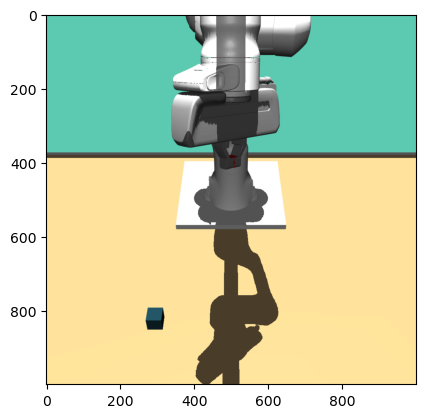

In [ ]:
plt.imshow(rgb_img)

(array([53808., 27813., 16088.,     0.,     0.,     0.,     0.,     0.,
        23774., 71132., 66185., 55923., 54000., 50000., 45480., 47041.,
        52044., 35977., 29557., 28106., 26891., 22668., 16334.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  9961., 11076., 10457.,
         9281.,  9345.,  7805.,  8485.,  7778.,  7788.,  7090.,  7103.,
         7125.,  7166.,  7242.,  6693.,  6565.,  6499.,  5829.,  6591.,
         6065.,  6242.,  5578.,  6504.,  6636.,  5880.,  5880.,  5849.,
         5303.,  4436.,  5139.,  4375.,  4321.,  4961.,  4197.,  3473.,
         4155.,  4146.,  3429.,  4075.,  3368.,  3356.,  3344.,  3332.,
         3322.,  3314.,  3310.,  3310.]),
 array([0.59543282, 0.64903498, 0.70263714, 0.7562393 , 0.80984145,
        0.86344367, 0.9170

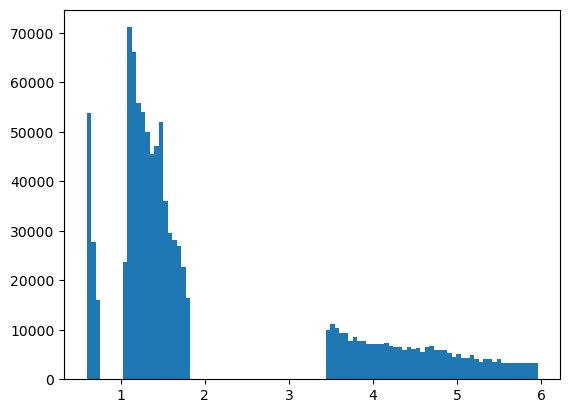

In [ ]:
fix, axes = plt.subplots(1, 2)

axes[0].hist(depth_img_denormalized.flatten(), bins=100)
axes[1].hist(depth_img_normalized.flatten(), bins=100)

plt.show()